In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

from preprocessing import *

In [2]:
label = 'teeth'

raw_data = f'./data/raw_data/{label}'
roi_data = f'./data/roi/{label}'

raw_data_files = os.listdir(raw_data)
roi_files = os.listdir(roi_data)

len(raw_data_files), len(roi_files)

(60, 60)

In [31]:
def filter(x):
    x = butter_bandpass_filter(x, 0.1, 10, 256, 3)
    x = butter_bandpass_filter(x, 0.1, 10, 256, 3)
    x = butter_bandpass_filter(x, 0.1, 10, 256, 3)
    x = butter_bandpass_filter(x, 0.1, 10, 256, 3)

    x= Implement_Notch_Filter(None, band=1, freq=3.8, ripple=100, order=2, filter_type='butter', data=x)
    x= Implement_Notch_Filter(None, band=1, freq=4.8, ripple=100, order=2, filter_type='butter', data=x)
    # x= Implement_Notch_Filter(None, band=10, freq=20, ripple=100, order=2, filter_type='butter', data=x)

    # x = savgol_filter(x, 3, 2)
    # x = denoise_wavelet(x,method='BayesShrink',mode='soft',wavelet='sym9',wavelet_levels=5,rescale_sigma=True)
    
    # fs = 256
    # lowcut = 0.2
    # highcut = 20
    # x= multiply(x)
    # x=median(x)
    # x=butter_bandpass_filter(x, lowcut, highcut, fs, order=2)
    # x= Implement_Notch_Filter(None, band=.2, freq=0.3, ripple=100, order=2, filter_type='butter', data=x)
    # x=denoise_wavelet(x, method='BayesShrink',mode='soft',wavelet='sym9',wavelet_levels=5,rescale_sigma=True)
    # x=savgol_filter(x, 200, polyorder=5,mode='constant')

    return x

def filter_0(x):
    x = x * 0

    return x

In [32]:
filters = [filter, filter, filter, filter]

In [33]:
def plot(raw_data_file, roi_file, start=0, end=100000):
    raw_data_df = pd.read_csv(raw_data_file).drop(columns=['timestamps', 'Right AUX'])
    roi_df = pd.read_csv(roi_file)

    roi = np.zeros(len(raw_data_df))
    for _, row in roi_df.iterrows():
        roi[int(row['ROILimits_1']):int(row['ROILimits_2'])] = int(row['Value'])
    x = list(range(len(raw_data_df)))

    channels = raw_data_df.columns

    plt.figure(figsize=(50, 30)).suptitle(raw_data_file, fontsize=20)

    for i, channel in enumerate(channels):
        plt.subplot(4, 4, i*4+1)
        plt.plot(raw_data_df[channel].loc[start:end])

        ft = np.fft.rfft(raw_data_df[channel])
        freq = np.fft.rfftfreq(len(raw_data_df[channel]), 1/256)
        plt.subplot(4, 4, i*4+2)
        plt.plot(freq[freq<10], abs(ft[freq<10]))

        filtered_data = filters[i](raw_data_df[channel].to_numpy())
        plt.subplot(4, 4, i*4+3)
        plt.plot(filtered_data[start:end])

        ft = np.fft.rfft(filtered_data)
        freq = np.fft.rfftfreq(len(filtered_data), 1/256)
        plt.subplot(4, 4, i*4+4)
        plt.plot(freq[freq<10], abs(ft[freq<10]))


    plt.show()

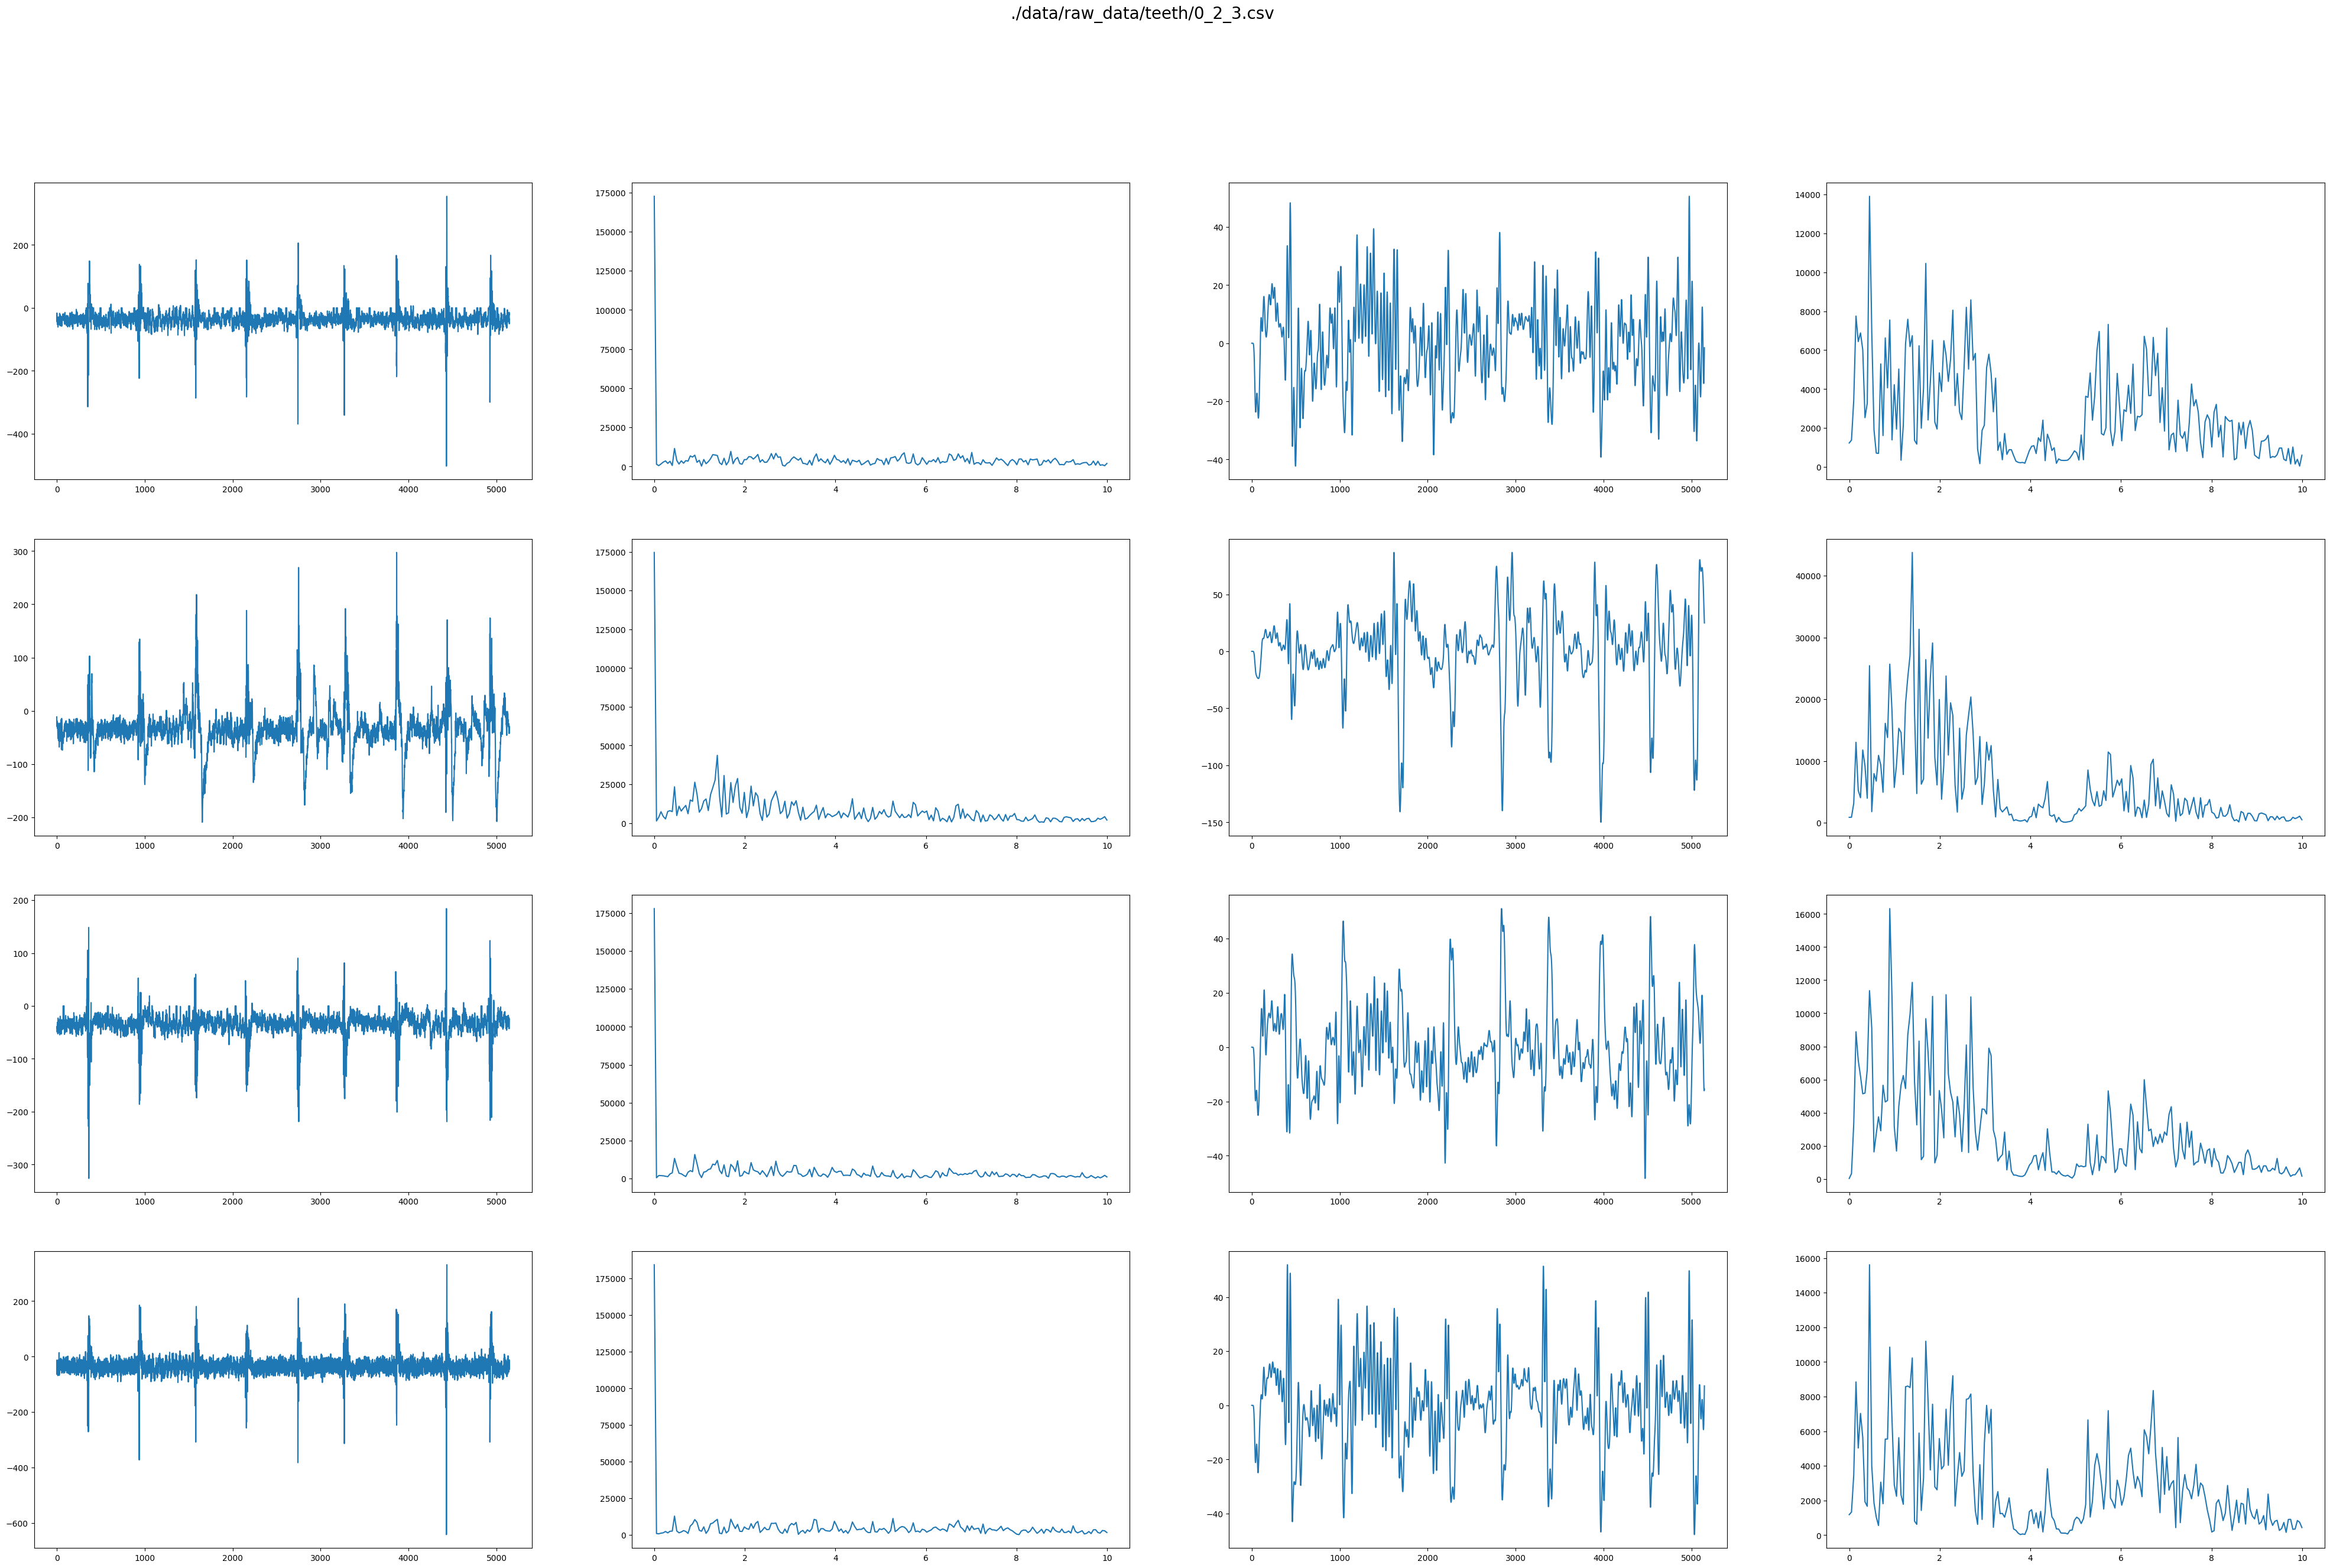

In [34]:
for raw_data_file, roi_file in zip(raw_data_files, roi_files):
    plot(f'{raw_data}/{raw_data_file}', f'{roi_data}/{roi_file}')#, 400, 600)
    break